In [1]:
# Used for unpickling byte stream of python objects on file system/disk
import pickle
import gzip
import numpy as np

Loading MNIST Dataset

In [2]:
# Opening and decompressing .gzip file
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')

# Unpickling .pkl file saved as byte stream on disk to python objects
trainingData, validationData, testingData = pickle.load(f, encoding='latin1')
f.close()

# Training feature vectors and training target extracted from trainingData (target represented using one-hot format)
trainingTarget = np.array([1 if  trainingData[1][i] == t else 0  for i in range(len(trainingData[1])) for t in range(10)]).reshape(-1,10)
trainingData = trainingData[0]

# Validation feature vectors and validation target extracted from validationData
validationTarget = validationData[1]
validationData = validationData[0]

# Testing feature vectors and testing target extracted from testingData
testingTarget = testingData[1]
testingData = testingData[0]

Loading USPS Dataset

In [3]:
# Used to open image in file system/disk
from PIL import Image
import os
import numpy as np

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'D:/Ghozy/Tel-U/AI Lab/CV digit recognition/USPSdata/USPSdata/Numerals'
savedImg = []

# Navigate to the 10 folders containing images for 10 labels
for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':

            # Open image resize it, and save image array as well as labels in 2 lists
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

Neural Networks

In [5]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [6]:
#DNN
num_classes = len(trainingTarget[0])
DNNclassifier = Sequential()
DNNclassifier.add(Dense(units=200, activation='relu', input_shape=(len(trainingData[0]),)))
DNNclassifier.add(Dropout(0.2))
DNNclassifier.add(Dense(units=200, activation='relu'))
DNNclassifier.add(Dropout(0.2))
# DNNclassifier.add(Dense(units=200, activation='relu'))
# DNNclassifier.add(Dropout(0.2))
DNNclassifier.add(Dense(units=num_classes, activation='softmax'))
DNNclassifier.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])
history = DNNclassifier.fit(trainingData, trainingTarget, batch_size=128, epochs=100,
verbose=False,validation_data=(validationData, keras.utils.to_categorical(validationTarget, num_classes)))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from sklearn.metrics import confusion_matrix

loss,valAccuracy = DNNclassifier.evaluate(validationData, keras.utils.to_categorical(validationTarget, num_classes), verbose=False)
loss,testAccuracy = DNNclassifier.evaluate(testingData, keras.utils.to_categorical(testingTarget, num_classes), verbose=False)
loss,testUSPSAccuracy = DNNclassifier.evaluate(np.array(USPSMat), keras.utils.to_categorical(USPSTar, num_classes), verbose=False)
dnnMNISTPrediction = np.argmax(DNNclassifier.predict(testingData), axis=1)
dnnUSPSPrediction = np.argmax(DNNclassifier.predict(np.array(USPSMat)), axis=1)

print ('---------------DNN----------------\n')
print('Validation accuracy    = ', valAccuracy*100)
print('MNIST Testing accuracy = ', testAccuracy*100)
print('USPS Testing accuracy  = ', testUSPSAccuracy*100,'"\n"')
print("\nMNIST Confusion Matrix: \n\n",confusion_matrix(testingTarget, dnnMNISTPrediction))
print("\nUSPS Confusion Matrix: \n\n",confusion_matrix(USPSTar, dnnUSPSPrediction))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step
---------------DNN----------------

Validation accuracy    =  98.18999767303467
MNIST Testing accuracy =  98.18999767303467
USPS Testing accuracy  =  46.80233895778656 "
"

MNIST Confusion Matrix: 

 [[ 970    0    2    1    1    2    1    1    2    0]
 [   0 1128    1    0    0    0    2    1    3    0]
 [   3    1 1012    3    1    0    4    5    2    1]
 [   0    0    1  998    0    3    0    4    4    0]
 [   0    0    5    0  964    1    3    1    1    7]
 [   2    0    0    7    1  872    4    2    3    1]
 [   4    2    1    1    3    4  943    0    0    0]
 [   0    5    6    3    0    0    0 1007    2    5]
 [   3    0    4    6    3    3    2    5  945    3]
 [   3    3    0    6    7    3    1    5    1  980]]

USPS Confusion Matrix: 

 [[ 574    0  233  163  106  114  164  201   93  352]
 [  25  466  497   79  222  106   18  485   70   32]
 [  44   13 1613   60   13   91   94   41   28    2]

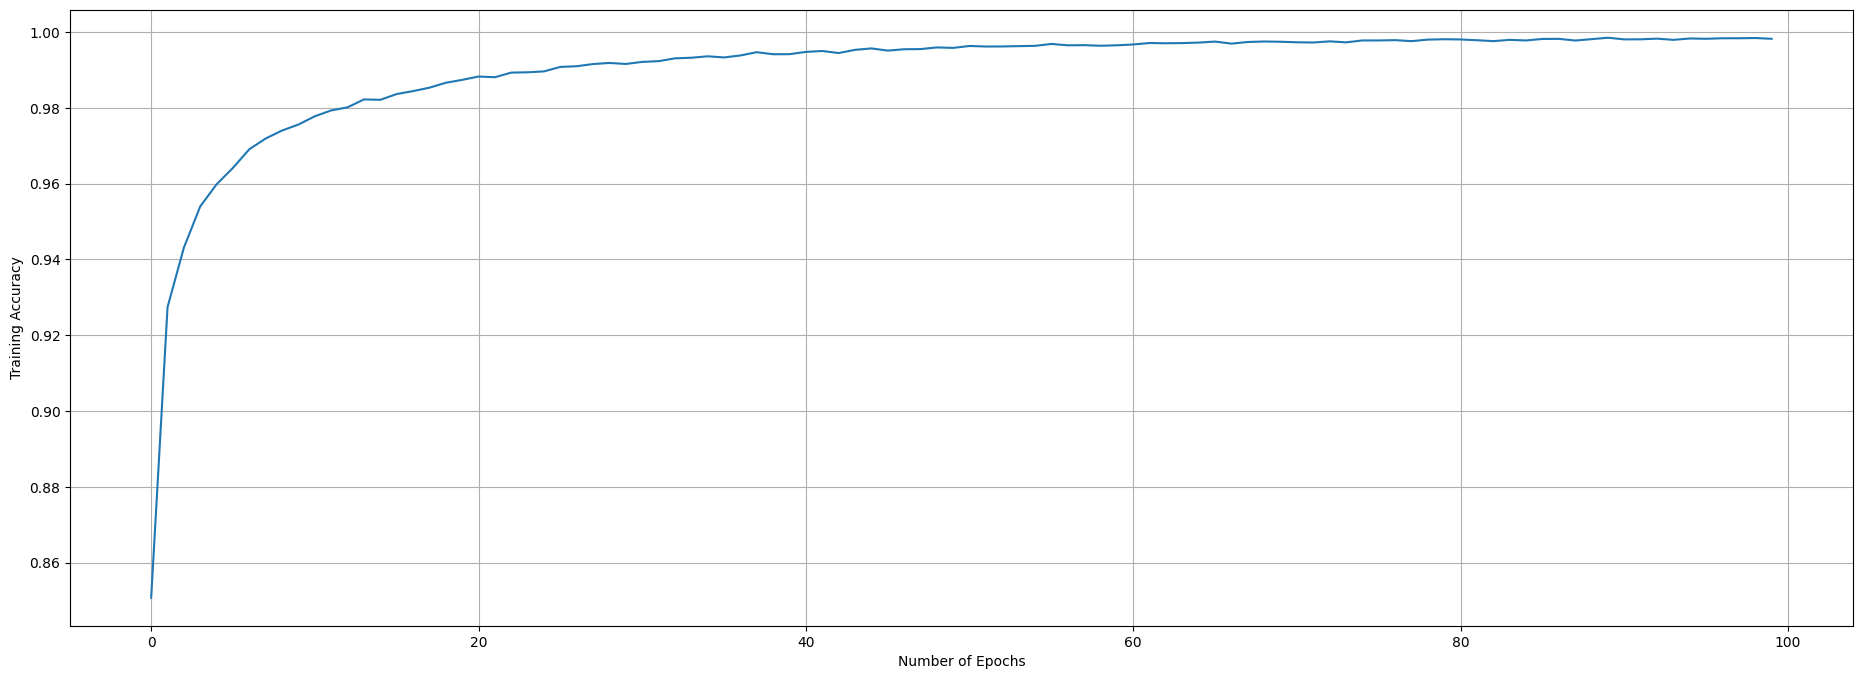

In [8]:
# The matplotlib package is used for plotting graphs
import matplotlib
import matplotlib.pyplot as plt
# Outputs training accuracy and loss against epochs
fig2, ax2=plt.subplots(figsize=(23,8))
ax2.plot(history.history['accuracy'])
ax2.set(xlabel='Number of Epochs', ylabel='Training Accuracy')
ax2.grid()
plt.show()

In [9]:
#CNN
CNNclassifier = Sequential()
CNNclassifier.add(Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
CNNclassifier.add(MaxPooling2D(pool_size=(2, 2)))
CNNclassifier.add(Conv2D(20, (3, 3), activation='relu'))
CNNclassifier.add(MaxPooling2D(pool_size=(2, 2)))
CNNclassifier.add(Flatten())
CNNclassifier.add(Dense(units=200, activation='relu'))
CNNclassifier.add(Dropout(0.2))
CNNclassifier.add(Dense(units=200, activation='relu'))
CNNclassifier.add(Dropout(0.2))
CNNclassifier.add(Dense(units=num_classes, activation='softmax'))
CNNclassifier.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])
history = CNNclassifier.fit(trainingData.reshape(-1, 28, 28, 1), trainingTarget, batch_size=128, epochs=10,
verbose=True,validation_data=(validationData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(validationTarget, num_classes)))

Epoch 1/10


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6918 - loss: 0.9887 - val_accuracy: 0.9588 - val_loss: 0.1385
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9498 - loss: 0.1673 - val_accuracy: 0.9780 - val_loss: 0.0797
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9671 - loss: 0.1045 - val_accuracy: 0.9818 - val_loss: 0.0657
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9756 - loss: 0.0781 - val_accuracy: 0.9831 - val_loss: 0.0624
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9855 - val_loss: 0.0538
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9817 - loss: 0.0588 - val_accuracy: 0.9883 - val_loss: 0.0451
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9850 - loss: 0.0510 - val_accuracy: 0.9880 - val_loss: 0.0432
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9866 - loss: 0.0426 - val_accuracy: 0.

In [10]:
loss,valAccuracy = CNNclassifier.evaluate(validationData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(validationTarget, num_classes), verbose=False)
loss,testAccuracy = CNNclassifier.evaluate(testingData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(testingTarget, num_classes), verbose=False)
loss,testUSPSAccuracy = CNNclassifier.evaluate(np.array(USPSMat).reshape(-1, 28, 28, 1), keras.utils.to_categorical(USPSTar, num_classes), verbose=False)
cnnMNISTPrediction = np.argmax(CNNclassifier.predict(testingData.reshape(-1, 28, 28, 1)), axis=1)
cnnUSPSPrediction = np.argmax(CNNclassifier.predict(np.array(USPSMat).reshape(-1, 28, 28, 1)), axis=1)

print ('---------------CNN----------------\n')
print('Validation accuracy    = ', valAccuracy*100)
print('MNIST Testing accuracy = ', testAccuracy*100)
print('USPS Testing accuracy  = ', testUSPSAccuracy*100,"\n")
print("\nMNIST Confusion Matrix: \n\n",confusion_matrix(testingTarget, cnnMNISTPrediction))
print("\nUSPS Confusion Matrix: \n\n",confusion_matrix(USPSTar, cnnUSPSPrediction))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
---------------CNN----------------

Validation accuracy    =  98.87999892234802
MNIST Testing accuracy =  98.89000058174133
USPS Testing accuracy  =  63.43817114830017 


MNIST Confusion Matrix: 

 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    2    0    0    0    2    0    0    0]
 [   2    1 1026    0    1    0    0    2    0    0]
 [   0    0    3 1000    0    2    0    1    4    0]
 [   0    1    0    0  980    0    0    0    1    0]
 [   2    0    1    4    0  877    4    1    2    1]
 [   4    2    0    0    1    2  948    0    1    0]
 [   0    3    9    1    0    0    0 1014    0    1]
 [   4    0    2    2    0    0    0    1  964    1]
 [   3    2    1    0   14    5    0    7    5  972]]

USPS Confusion Matrix: 

 [[ 668    2   96    7  330   14   49   28   40  766]
 [  76  912  118   15  451    5   21  348   44   10]
 [  51    8 1692   41   28   55   53   16   51    4]
 [ 

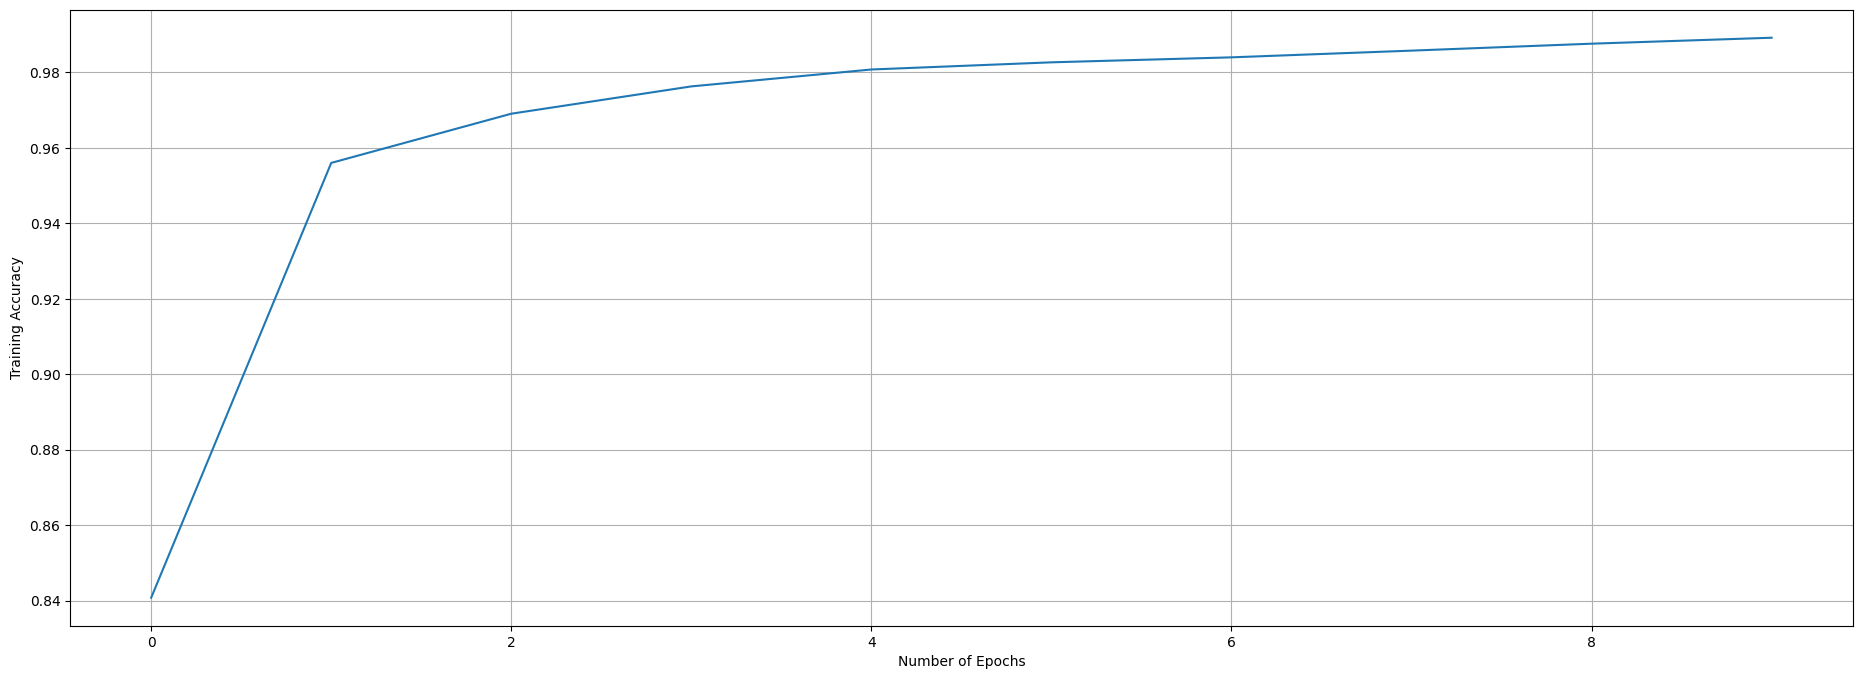

In [11]:
# The matplotlib package is used for plotting graphs
import matplotlib
import matplotlib.pyplot as plt
# Outputs training accuracy and loss against epochs
fig2, ax2=plt.subplots(figsize=(23,8))
ax2.plot(history.history['accuracy'])
ax2.set(xlabel='Number of Epochs', ylabel='Training Accuracy')
ax2.grid()
plt.show()